In [341]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [342]:
train_base=pd.read_csv('train.csv')
test_base=pd.read_csv('test.csv')
data=pd.read_csv('campaign_data.csv')
print(train_base.head())
print(train_base.info())

          id  user_id  campaign_id         send_date  is_open  is_click
0   42_14051    14051           42  01-09-2017 19:55        0         0
1  52_134438   134438           52  02-11-2017 12:53        0         0
2  33_181789   181789           33  24-07-2017 15:15        0         0
3  44_231448   231448           44  05-09-2017 11:36        0         0
4  29_185580   185580           29  01-07-2017 18:01        0         0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023191 entries, 0 to 1023190
Data columns (total 6 columns):
id             1023191 non-null object
user_id        1023191 non-null int64
campaign_id    1023191 non-null int64
send_date      1023191 non-null object
is_open        1023191 non-null int64
is_click       1023191 non-null int64
dtypes: int64(4), object(2)
memory usage: 46.8+ MB
None


In [343]:
#train_base['send_date']=pd.to_datetime(train_base['send_date'])
#test_base['send_date']=pd.to_datetime(test_base['send_date'])

In [344]:
train_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023191 entries, 0 to 1023190
Data columns (total 6 columns):
id             1023191 non-null object
user_id        1023191 non-null int64
campaign_id    1023191 non-null int64
send_date      1023191 non-null object
is_open        1023191 non-null int64
is_click       1023191 non-null int64
dtypes: int64(4), object(2)
memory usage: 46.8+ MB


In [345]:
#train_base['date']=train_base['send_date'].apply(lambda x:x.date()).astype(datetime)
#train_base['day']=train_base['send_date'].apply(lambda x:x.weekday())
#train_base['time']=train_base['send_date'].apply(lambda x:x.strftime('%H')).astype(int)

#test_base['date']=test_base['send_date'].apply(lambda x:x.date()).astype(datetime)
#test_base['day']=test_base['send_date'].apply(lambda x:x.weekday())
#test_base['time']=test_base['send_date'].apply(lambda x:x.strftime('%H')).astype(int)

In [346]:
#train_base.to_csv('train_base_clean.csv', index=False)
#test_base.to_csv('test_clean.csv', index=False)

train_base=pd.read_csv('train_base_clean.csv')
test_clean=pd.read_csv('test_clean.csv')
data=pd.read_csv('campaign_data.csv')

In [347]:
data.head(2)

,campaign_id,communication_type,total_links,no_of_internal_links,no_of_images,no_of_sections,email_body,subject,email_url
0,29,Newsletter,67,61,12,3,"Dear AVians,\r\n \r\nWe are shaping up a super...",Sneak Peek: A look at the emerging data scienc...,http://r.newsletters.analyticsvidhya.com/7um44...
1,30,Upcoming Events,18,14,7,1,"Dear AVians,\r\n \r\nAre your eager to know wh...",[July] Data Science Expert Meetups & Competiti...,http://r.newsletters.analyticsvidhya.com/7up0e...


In [348]:
test_base.head()

,id,campaign_id,user_id,send_date
0,63_122715,63,122715,01-02-2018 22:35
1,56_76206,56,76206,02-01-2018 08:15
2,57_96189,57,96189,05-01-2018 18:25
3,56_166917,56,166917,02-01-2018 08:15
4,56_172838,56,172838,02-01-2018 08:12


In [349]:
import re
data['email_char']=data['email_body'].apply(lambda x: len(re.findall("[a-zA-Z_]+", x)))
data.drop(['email_body', 'subject','email_url'], axis=1, inplace=True)
print(data.head(2))
print(train_base.head(2))
print(test_clean.head(2))

   campaign_id communication_type  total_links  no_of_internal_links  \
0           29         Newsletter           67                    61   
1           30    Upcoming Events           18                    14   

   no_of_images  no_of_sections  email_char  
0            12               3         242  
1             7               1          33  
          id  user_id  campaign_id            send_date  is_open  is_click  \
0   42_14051    14051           42  2017-01-09 19:55:00        0         0   
1  52_134438   134438           52  2017-02-11 12:53:00        0         0   

         date  day  time  
0  2017-01-09    0    19  
1  2017-02-11    5    12  
          id  campaign_id  user_id            send_date        date  day  time
0  63_122715           63   122715  2018-01-02 22:35:00  2018-01-02    1    22
1   56_76206           56    76206  2018-02-01 08:15:00  2018-02-01    3     8


In [350]:
train=train_base.merge(data, how='left', on='campaign_id')
test=test_clean.merge(data, how='left', on='campaign_id')
train.head()

,id,user_id,campaign_id,send_date,is_open,is_click,date,day,time,communication_type,total_links,no_of_internal_links,no_of_images,no_of_sections,email_char
0,42_14051,14051,42,2017-01-09 19:55:00,0,0,2017-01-09,0,19,Newsletter,88,79,13,4,231
1,52_134438,134438,52,2017-02-11 12:53:00,0,0,2017-02-11,5,12,Newsletter,67,62,10,4,158
2,33_181789,181789,33,2017-07-24 15:15:00,0,0,2017-07-24,0,15,Others,7,3,1,1,119
3,44_231448,231448,44,2017-05-09 11:36:00,0,0,2017-05-09,1,11,Upcoming Events,60,56,19,6,42
4,29_185580,185580,29,2017-01-07 18:01:00,0,0,2017-01-07,5,18,Newsletter,67,61,12,3,242


In [351]:
train=train[['day', 'time', 'communication_type', 'total_links',
       'no_of_internal_links', 'no_of_images', 'no_of_sections', 'email_char', 'is_open', 'is_click']]

test=test[['day', 'time', 'communication_type', 'total_links',
       'no_of_internal_links', 'no_of_images', 'no_of_sections', 'email_char']]

In [352]:
train['communication_type']=train['communication_type'].map({'Newsletter':0, 'Upcoming Events':1, 'Conference':3, 
                                               'Others':4, 'Webinar':5,'Corporate':6, 'Hackathon':7}).astype(int)

test['communication_type']=test['communication_type'].map({'Newsletter':0, 'Upcoming Events':1, 'Conference':3, 
                                               'Others':4, 'Webinar':5,'Corporate':6, 'Hackathon':7}).astype(int)

In [353]:
train.head()

,day,time,communication_type,total_links,no_of_internal_links,no_of_images,no_of_sections,email_char,is_open,is_click
0,0,19,0,88,79,13,4,231,0,0
1,5,12,0,67,62,10,4,158,0,0
2,0,15,4,7,3,1,1,119,0,0
3,1,11,1,60,56,19,6,42,0,0
4,5,18,0,67,61,12,3,242,0,0


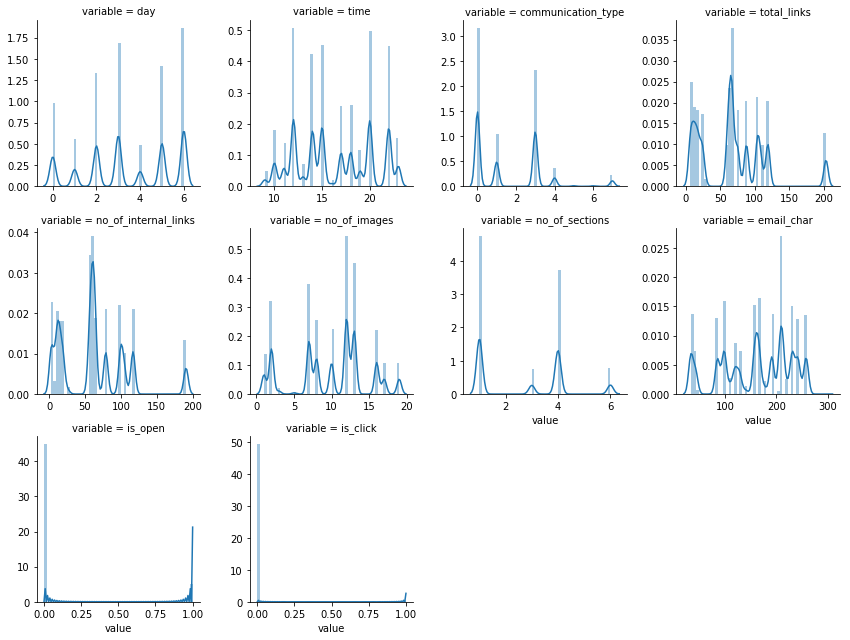

In [354]:
import seaborn as sns
num=[f for f in train.columns if train.dtypes[f]!='object']
nd = pd.melt(train, value_vars = num)
n1 = sns.FacetGrid(nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

In [368]:
train=train[(train['communication_type']<=4) & (train['total_links']<=130) & (train['no_of_sections']<=4) & (train['no_of_internal_links']<=140)]

#Trying Under Sampling
from sklearn.utils import shuffle

train_neg=train[train['is_click']==0]
train_pos=train[train['is_click']==1]
train_new=pd.concat([train_neg.iloc[:200000,:], train_pos,train_pos,train_pos,train_pos,train_pos,train_pos, train_pos, train_pos, train_pos])
train_new=shuffle(train_new, random_state=42).reset_index(drop=True)
print("Length of Neg:",len(train_neg))
print("Length of pos:",len(train_pos))
print("Length of Train_new:", len(train_new))

In [369]:
X_train=train.iloc[:,:-2]
y_train=train.iloc[:,-1]

In [370]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score


train_X, test_x, train_Y, test_y=train_test_split(X_train, y_train, test_size=0.3, random_state=42)
columns = train_X.columns

In [ ]:
#Undersampling with RandomUnderSampler

from imblearn.under_sampling import RandomUnderSampler 
rus = RandomUnderSampler(ratio=1, random_state=42)
train_x, train_y = rus.fit_sample(train_X, train_Y)
train_x = pd.DataFrame(data=train_x,columns=columns)
train_y= pd.DataFrame(data=train_y,columns=["is_click"])
# we can Check the numbers of our data
print("length of oversampled data is ",len(train_x))
print("Number of Negative class in oversampled data",len(train_y[train_y["is_click"]==0]))
print("No.of postive class",len(train_y[train_y["is_click"]==1]))
print("Proportion of Negative class in oversampled data is ",len(train_y[train_y["is_click"]==0])/len(train_x))
print("Proportion of postive class in oversampled data is ",len(train_y[train_y["is_click"]==1])/len(train_x))

In [371]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(ratio=1, random_state=42)
train_x, train_y = ros.fit_sample(train_X, train_Y)
train_x = pd.DataFrame(data=train_x,columns=columns)
train_y= pd.DataFrame(data=train_y,columns=["is_click"])
# we can Check the numbers of our data
print("length of oversampled data is ",len(train_x))
print("Number of Negative class in oversampled data",len(train_y[train_y["is_click"]==0]))
print("No.of postive class",len(train_y[train_y["is_click"]==1]))
print("Proportion of Negative class in oversampled data is ",len(train_y[train_y["is_click"]==0])/len(train_x))
print("Proportion of postive class in oversampled data is ",len(train_y[train_y["is_click"]==1])/len(train_x))

C:\Users\manth\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


length of oversampled data is  1180158
Number of Negative class in oversampled data 590079
No.of postive class 590079
Proportion of Negative class in oversampled data is  0.5
Proportion of postive class in oversampled data is  0.5


In [ ]:
#Oversamplinng with SMOTE

from imblearn.over_sampling import SMOTE
os = SMOTE(ratio=1, k=5, random_state=42)
train_x,train_y=os.fit_sample(train_x,train_y)
train_x = pd.DataFrame(data=train_x,columns=columns)
train_y= pd.DataFrame(data=train_y,columns=["is_click"])
# we can Check the numbers of our data
print("length of oversampled data is ",len(train_x))
print("Number of Negative class in oversampled data",len(train_y[train_y["is_click"]==0]))
print("No.of postive class",len(train_y[train_y["is_click"]==1]))
print("Proportion of Negative class in oversampled data is ",len(train_y[train_y["is_click"]==0])/len(train_x))
print("Proportion of postive class in oversampled data is ",len(train_y[train_y["is_click"]==1])/len(train_x))

In [372]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty='l2',C=10, random_state=42,class_weight='balanced')
lr.fit(train_x, train_y)
pred_y_lr=lr.predict(test_x)
print(classification_report(test_y, pred_y_lr))
print("-"*50)
print('roc_auc_score_lr:%4f' %roc_auc_score(test_y, pred_y_lr))

C:\Users\manth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


             precision    recall  f1-score   support

          0       0.99      0.47      0.64    252986
          1       0.01      0.60      0.02      2891

avg / total       0.98      0.47      0.63    255877

--------------------------------------------------
roc_auc_score_lr:0.532588


In [373]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=6, oob_score=True, random_state=42)
rf.fit(train_x, train_y)
pred_y_rf=rf.predict(test_x)
print(classification_report(test_y, pred_y_rf))
print("-"*50)
print('roc_auc_score_rf:%4f' %roc_auc_score(test_y, pred_y_rf))

C:\Users\manth\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


             precision    recall  f1-score   support

          0       0.99      0.48      0.65    252986
          1       0.01      0.62      0.03      2891

avg / total       0.98      0.48      0.64    255877

--------------------------------------------------
roc_auc_score_rf:0.549620


In [374]:
#Appying XGboost

from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier(learning_rate=1, n_estimators=50, max_depth=4)
xgb.fit(train_x, train_y)
pred_y_xgb=xgb.predict(test_x)
print(classification_report(test_y, pred_y_xgb))
print("-"*50)
print('roc_auc_score_xgb:%4f' %roc_auc_score(test_y, pred_y_xgb))

C:\Users\manth\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\manth\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


             precision    recall  f1-score   support

          0       0.99      0.53      0.69    252986
          1       0.01      0.57      0.03      2891

avg / total       0.98      0.53      0.68    255877

--------------------------------------------------
roc_auc_score_xgb:0.548501


C:\Users\manth\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [375]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini',max_depth=4)
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=50, learning_rate=1, random_state=42)
ada.fit(train_x, train_y)
pred_y_ada=ada.predict(test_x)
print(classification_report(test_y, pred_y_ada))
print("-"*50)
print('roc_auc_score_ada:%4f' %roc_auc_score(test_y, pred_y_ada))

C:\Users\manth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


             precision    recall  f1-score   support

          0       0.99      0.53      0.69    252986
          1       0.01      0.57      0.03      2891

avg / total       0.98      0.53      0.68    255877

--------------------------------------------------
roc_auc_score_ada:0.548501


In [376]:
#Applying model in test data

from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(estimators=[('forest', rf), ('xgb', xgb), ('adboost', ada)], voting='hard')
eclf.fit(train_x, train_y)
pred_y_eclf=eclf.predict(test_x)
print(classification_report(test_y, pred_y_ada))
#print("-"*50)
#print('roc_auc_score_eclf:%4f' %roc_auc_score(test_y, pred_y_eclf))

C:\Users\manth\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\manth\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\manth\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


             precision    recall  f1-score   support

          0       0.99      0.53      0.69    252986
          1       0.01      0.57      0.03      2891

avg / total       0.98      0.53      0.68    255877



C:\Users\manth\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [377]:
predictions=eclf.predict(test)

C:\Users\manth\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\manth\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [378]:
temp=pd.DataFrame(predictions, columns=['is_click'], index=None)

test_predictions=pd.DataFrame(index=None)
test_predictions['id']=test_base['id']
test_predictions=pd.concat([test_predictions, temp], axis=1)
test_predictions.head()

,id,is_click
0,63_122715,1
1,56_76206,1
2,57_96189,0
3,56_166917,1
4,56_172838,1


In [379]:
test_predictions.to_csv('test_predictions.csv', index=False)